<font color='orange'>
<h1>- Imports <p></p>
- Einlesen der Klimadaten <p></p>
- Filtern der cvs-Datei für klimatische Entwicklung im Berner Oberland nach den relevanten Spalten</h1>
</font>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''
Relevante Spalten der Klima-Dateien:
- Date: Datum
- TAVG: durchschnittliche Temperatur
- PRCP: Niederschlag
'''
#Datei Klima Berner Oberland
df1 = pd.read_csv("Klima_BernerOberland.csv")
df1["DATE"] = pd.to_datetime(df1['DATE'], format='%Y-%m')
df1_filtered = df1[df1['DATE'] >= '2000-01-01']
df1_relevant = df1_filtered[["DATE", "TAVG", "PRCP"]]
print(df1_relevant)

# Jahr aus DATE-Spalte extrahieren
df1_relevant['Jahr'] = df1_relevant['DATE'].dt.year

# Nach Jahr gruppieren und den Durchschnitt berechnen
df_klima_bo_avg = df1_relevant.groupby('Jahr').agg({'TAVG': 'mean', 'PRCP': 'mean'}).reset_index()

print(df_klima_bo_avg)


# Datei Klima Yellowstone Nationalpark
#df2 = pd.read_csv("Klima_YellowstoneNationalpark.csv")
#df2[["DATE", "TAVG", "PRCP"]]

           DATE   TAVG  PRCP
1188 2000-01-01  -1.75  19.9
1189 2000-02-01   4.09  56.5
1190 2000-03-01   7.48  21.8
1191 2000-04-01  11.34  35.4
1192 2000-05-01  16.93  13.1
...         ...    ...   ...
1478 2024-05-01  15.17  74.9
1479 2024-06-01  19.24  47.7
1480 2024-07-01  22.04  58.4
1481 2024-08-01  22.15  28.1
1482 2024-09-01    NaN  68.9

[295 rows x 3 columns]
    Jahr       TAVG       PRCP
0   2000  11.105000  42.983333
1   2001  10.700833  54.158333
2   2002  11.310000  57.475000
3   2003  11.765833  35.550000
4   2004  10.831667  39.750000
5   2005  10.090833  41.633333
6   2006  10.915000  50.366667
7   2007  11.112500  63.116667
8   2008  11.077500  46.775000
9   2009  10.853333  43.000000
10  2010  10.346667  40.000000
11  2011  11.732500  40.375000
12  2012  11.335833  51.225000
13  2013  10.825000  47.308333
14  2014  12.212500  44.141667
15  2015  11.890833  41.675000
16  2016  10.924545  52.027273
17  2017  12.973636  48.700000
18  2018  12.824167  52.758333
19  2019

C:\Users\Julia\AppData\Local\Temp\ipykernel_22604\1968877722.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_relevant['Jahr'] = df1_relevant['DATE'].dt.year


<font color='orange'> <h1> Diagramm: BERNER OBERLAND Temperatur- und Niederschlagsentwicklung 2000-heute </h1> </font>

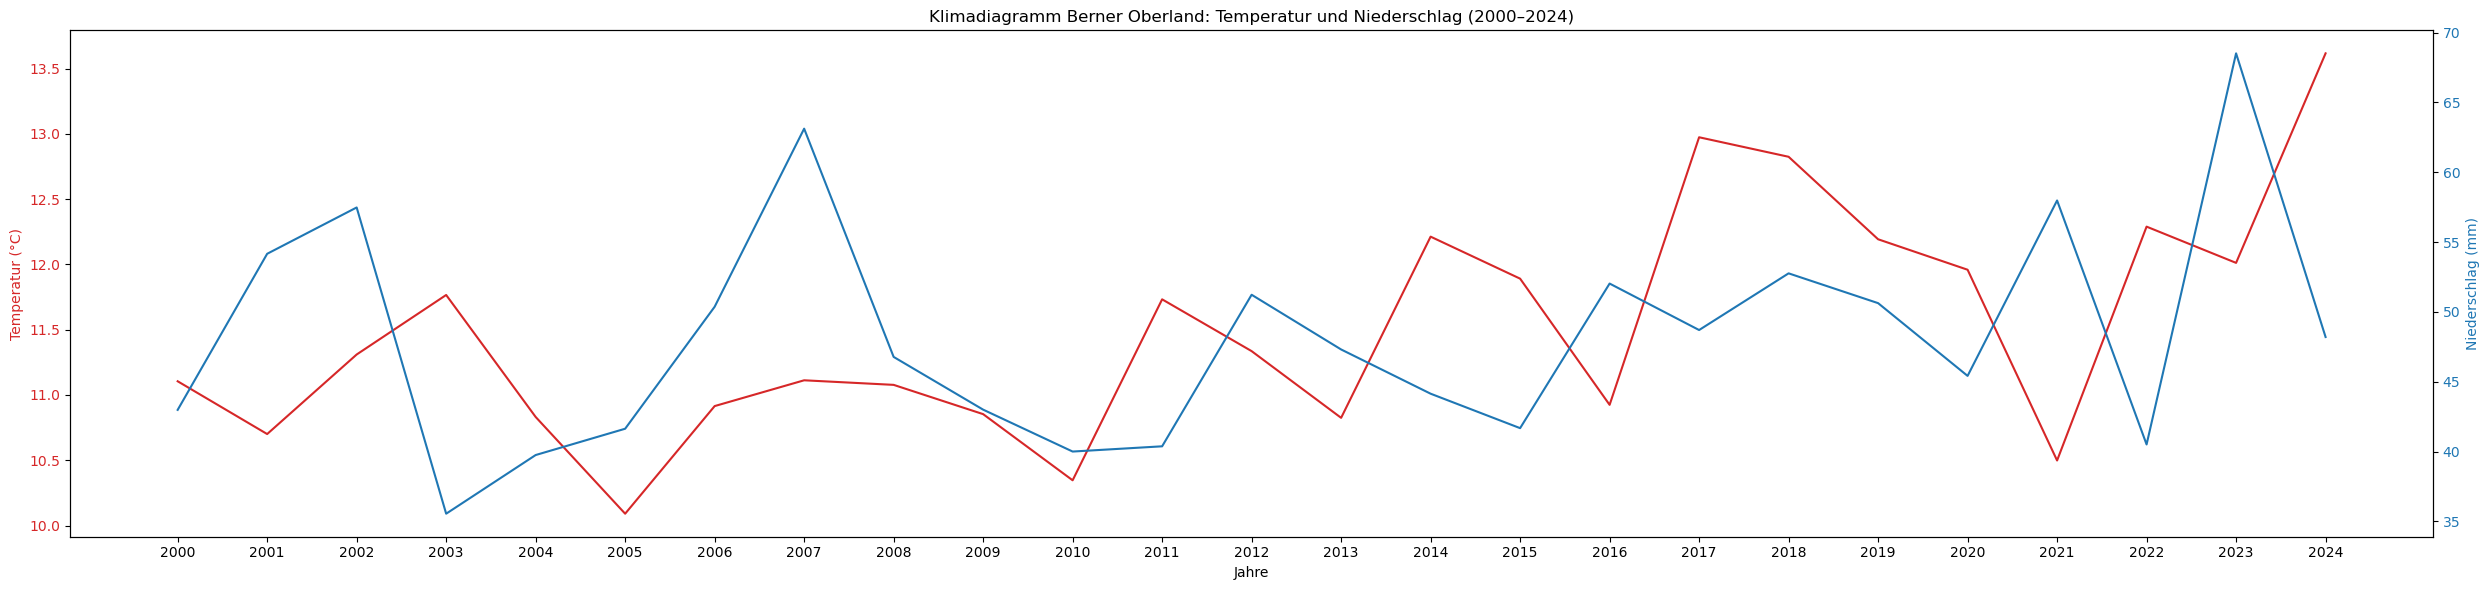

In [4]:

# Beispielhafte Daten, falls `df_klima_bo_avg` noch nicht existiert
# df_klima_bo_avg = df_klima_bo_avg[df_klima_bo_avg['Year'].between(2000, 2024)]

# Erstellen des Diagramms
fig, ax1 = plt.subplots(figsize=(25, 6))

# x-Achse (Jahre 2000-2024)
x = df_klima_bo_avg['Jahr']
y1 = df_klima_bo_avg['TAVG']
y2 = df_klima_bo_avg['PRCP']

# Temperatur (TAVG) auf der linken y-Achse
ax1.plot(x, y1, color='tab:red', label='Durchschnittstemperatur (TAVG)')
ax1.set_xlabel('Jahre')
ax1.set_ylabel('Temperatur (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Zweite y-Achse für den Niederschlag (PRCP)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:blue', label='Niederschlag (PRCP)')
ax2.set_ylabel('Niederschlag (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

years = list(range(2000, 2025))
plt.xticks(years)

# Titel und Layout
plt.title('Klimadiagramm Berner Oberland: Temperatur und Niederschlag (2000–2024)')
fig.tight_layout()
plt.show()


<font color='orange'> <h1>  Diagramm: YELLOWSTONE NATIONALPARK Temperatur- und Niederschlagsentwicklung 2000-heute </h></font>

In [6]:
#Datei Klima Berner Oberland
df_klima_ys = pd.read_csv("Klima_YellowstoneNationalpark.csv")
df_klima_ys["DATE"] = pd.to_datetime(df_klima_ys['DATE'], format='%Y-%m')
df_klima_ys_filtered = df_klima_ys[df_klima_ys['DATE'] >= '2000-01-01']
df_klima_ys_relevant = df_klima_ys_filtered[["DATE", "TAVG", "PRCP"]]
print(df_klima_ys_relevant)

# Jahr aus DATE-Spalte extrahieren
df_klima_ys_relevant = df_klima_ys_filtered[["DATE", "TAVG", "PRCP"]].copy()
df_klima_ys_relevant['Jahr'] = df_klima_ys_relevant['DATE'].dt.year


# Nach Jahr gruppieren und den Durchschnitt berechnen
df_klima_ys_avg = df_klima_ys_relevant.groupby('Jahr').agg({'TAVG': 'mean', 'PRCP': 'mean'}).reset_index()

print(df_klima_ys_avg)



          DATE   TAVG  PRCP
12  2000-01-01 -10.22  40.0
13  2000-02-01    NaN  28.2
14  2000-03-01    NaN  27.7
15  2000-08-01  13.11  25.8
16  2000-09-01   6.50  15.0
..         ...    ...   ...
277 2024-05-01   2.33  61.0
278 2024-06-01  10.32  31.6
279 2024-07-01  13.48  12.9
280 2024-08-01  12.61  32.0
281 2024-09-01   9.29  36.3

[270 rows x 3 columns]
    Jahr      TAVG       PRCP
0   2000 -1.631667  27.562500
1   2001  0.477500  29.816667
2   2002 -0.358182  33.750000
3   2003 -2.024000  33.766667
4   2004  0.322500  54.925000
5   2005  0.007500  52.400000
6   2006  0.200833  43.158333
7   2007  0.894167  46.425000
8   2008 -0.920000  47.741667
9   2009  0.223333  55.500000
10  2010  0.460909  56.009091
11  2011 -0.512500  55.533333
12  2012  1.597778  49.891667
13  2013  0.024167  43.691667
14  2015  1.525833  42.433333
15  2016  1.308333  51.208333
16  2017  0.555000  71.541667
17  2018  1.170000  56.518182
18  2019 -0.664545  49.245455
19  2020  0.188333  49.091667
20  2021  

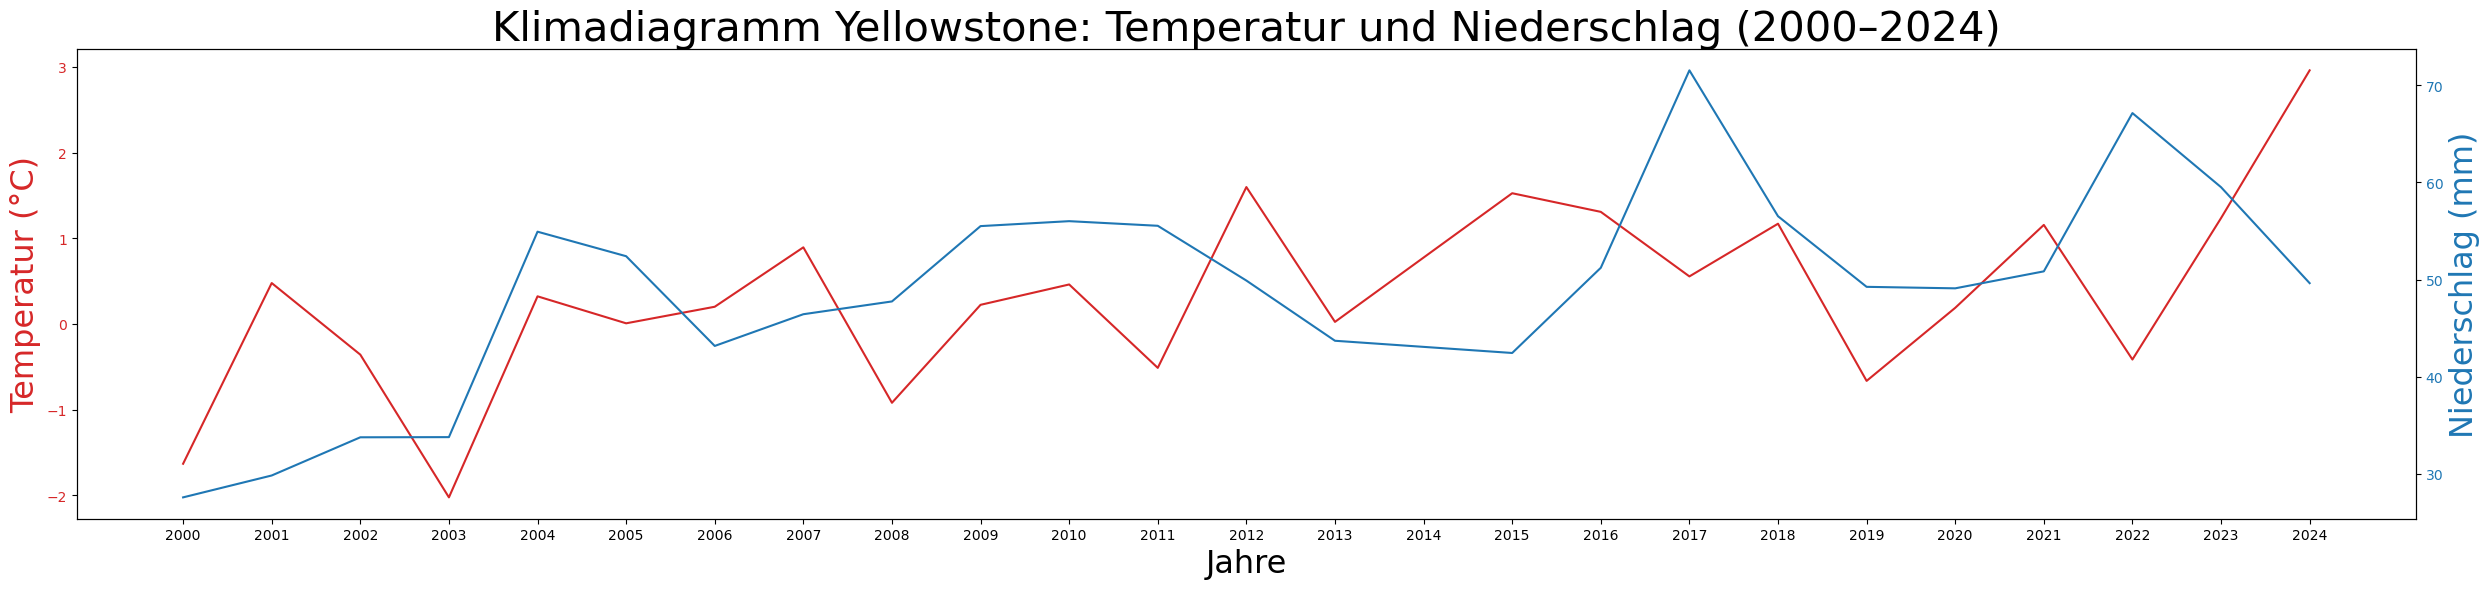

In [7]:

# Erstellen des Diagramms
fig, ax1 = plt.subplots(figsize=(25, 6))

# x-Achse (Jahre 2000-2024)
x = df_klima_ys_avg['Jahr']
y1 = df_klima_ys_avg['TAVG']
y2 = df_klima_ys_avg['PRCP']

# Temperatur (TAVG) auf der linken y-Achse
ax1.plot(x, y1, color='tab:red', label='Durchschnittstemperatur (TAVG)')
ax1.set_xlabel('Jahre', fontsize=23)
ax1.set_ylabel('Temperatur (°C)', color='tab:red', fontsize=23)
ax1.tick_params(axis='y', labelcolor='tab:red')

# Zweite y-Achse für den Niederschlag (PRCP)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:blue', label='Niederschlag (PRCP)')
ax2.set_ylabel('Niederschlag (mm)', color='tab:blue', fontsize=23)
ax2.tick_params(axis='y', labelcolor='tab:blue')

years = list(range(2000, 2025))
plt.xticks(years)

# Titel und Layout
plt.title('Klimadiagramm Yellowstone: Temperatur und Niederschlag (2000–2024)', fontsize=30)
fig.tight_layout()
plt.show()

<font color='orange'> <h1>  Übersicht Populationsentwicklung Berner Oberland und Yellowstone </h></font>

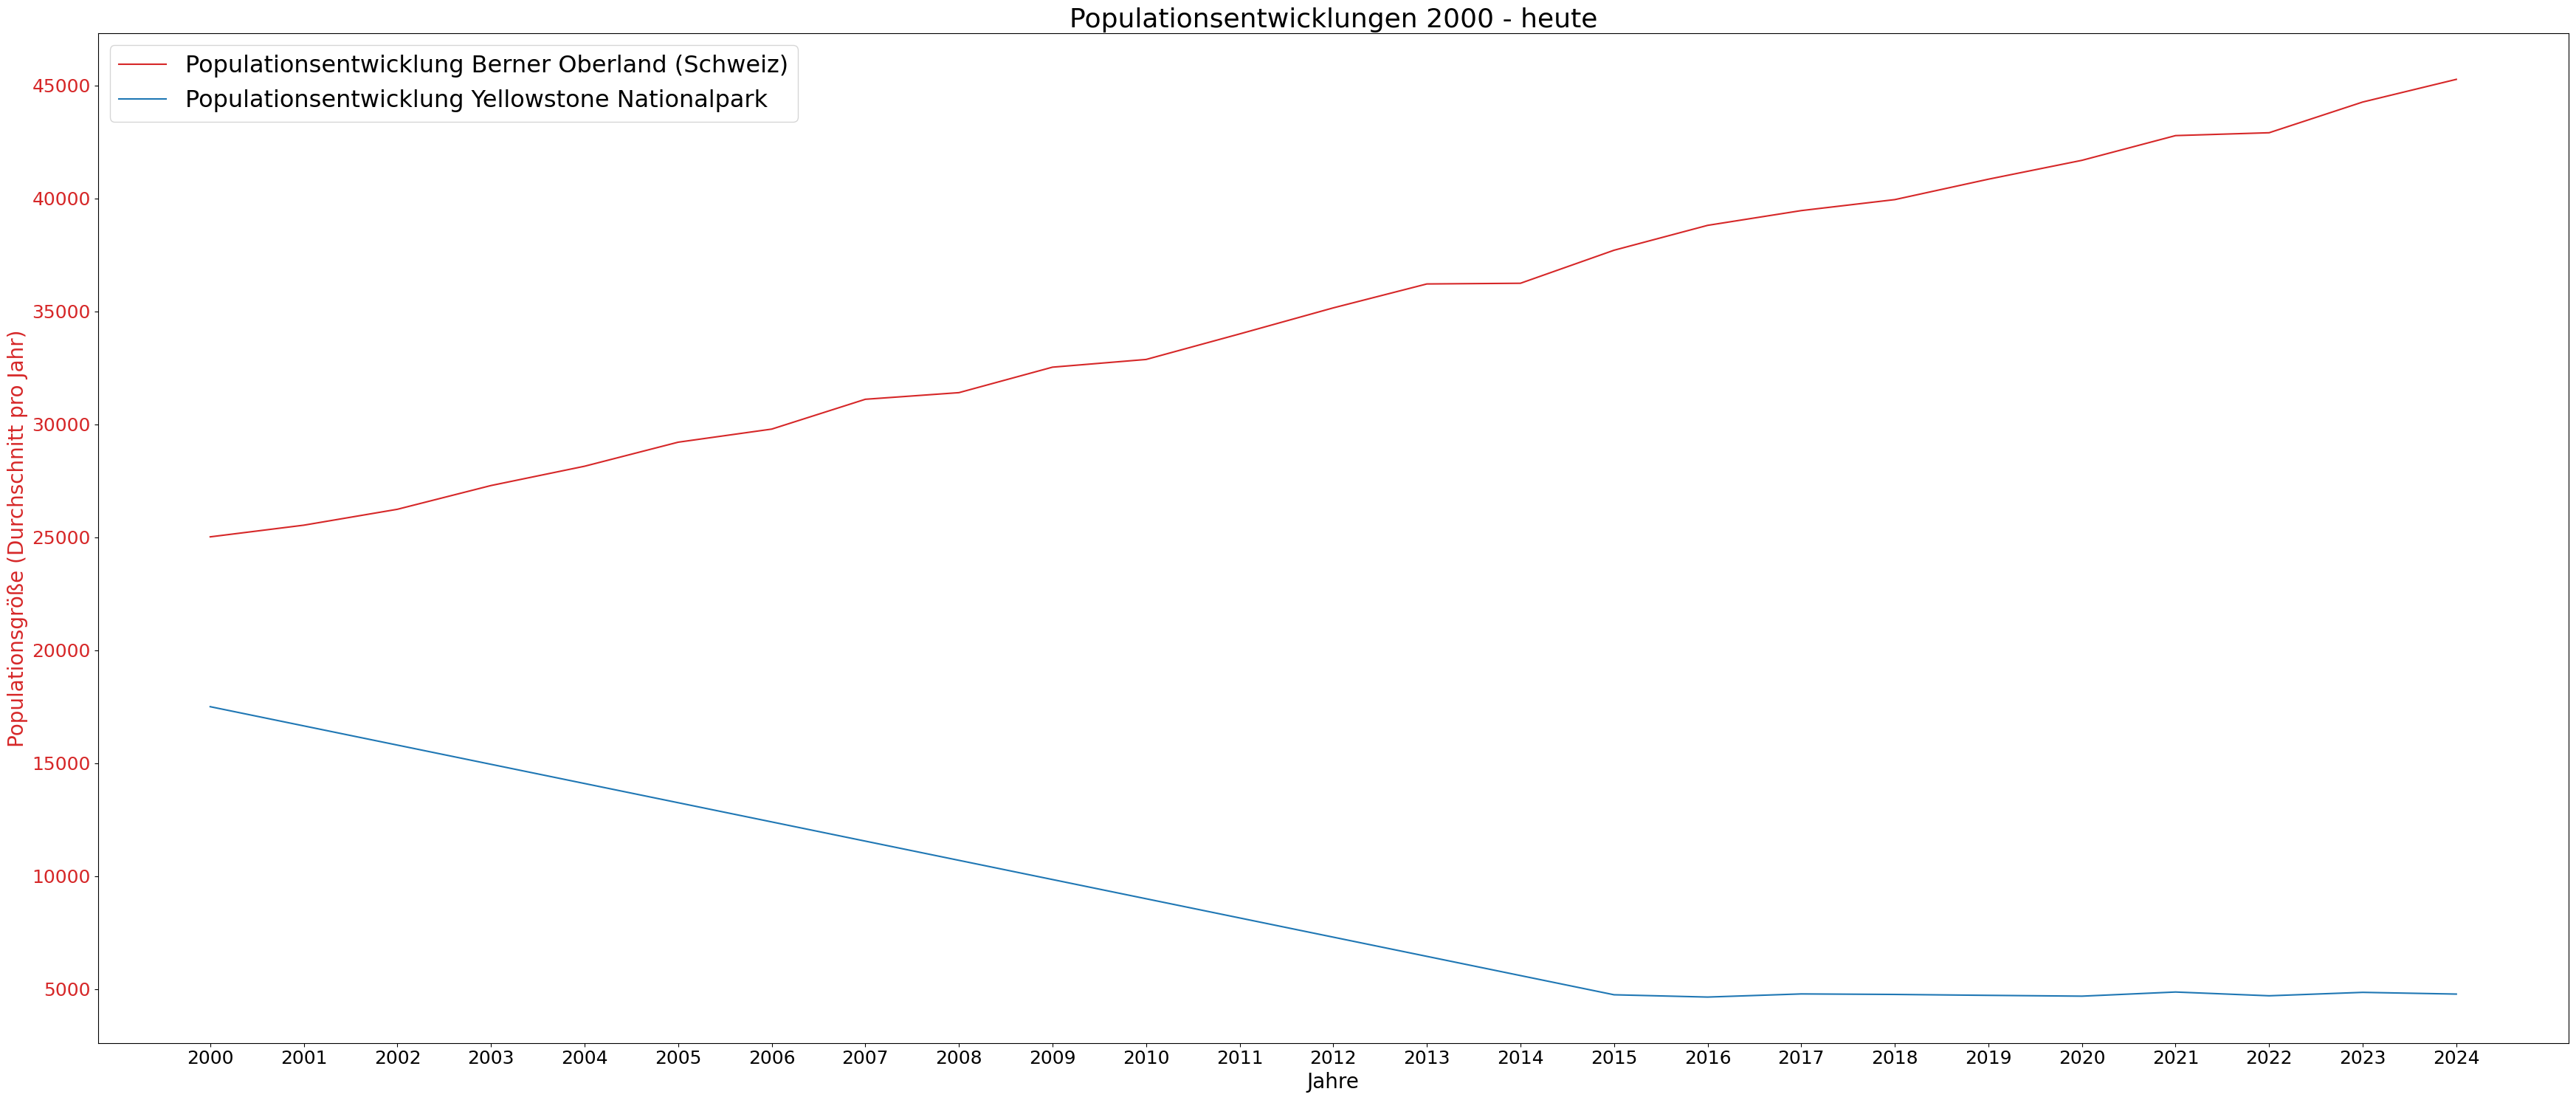

In [9]:
df_pop_bo = pd.read_csv("Population_Hirsch_BernerOberland.csv")
df_pop_ys = pd.read_csv("Population_Hirsch_Yellowstone.csv")

# Erstellen des Diagramms
fig, ax1 = plt.subplots(figsize=(35, 15))

# x-Achse (Jahre 2000-2024)
x = df_pop_bo['Jahr']
y1 = df_pop_bo['Durchschnittliche_Hirschpopulation']
y2 = df_pop_ys['Durchschnittliche_Hirschpopulation']

ax1.plot(x, y1, color='tab:red', label='Populationsentwicklung Berner Oberland (Schweiz)')
ax1.plot(x, y2, color='tab:blue', label='Populationsentwicklung Yellowstone Nationalpark')

ax1.set_xlabel('Jahre', fontsize=20)
ax1.set_ylabel('Populationsgröße (Durchschnitt pro Jahr)', color='tab:red', fontsize=20)

ax1.tick_params(axis='x', labelsize = 18)
ax1.tick_params(axis='y', labelsize = 18, labelcolor='tab:red')
ax1.legend(loc='upper left', fontsize = 23)

years = list(range(2000, 2025))
plt.xticks(years)

# Titel und Layout
plt.title('Populationsentwicklungen 2000 - heute' , fontsize=26)
fig.tight_layout()
plt.show()

<font color='orange'> <h1> Deskriptive Statistik Populationen (Berner Oberland & Yellowstone) </h1></font>

In [11]:
# Berechnung deskriptiver Statistiken
berner_stats = {
    "Mittelwert": df_pop_bo['Durchschnittliche_Hirschpopulation'].mean(),
    "Median": df_pop_bo['Durchschnittliche_Hirschpopulation'].median(),
    "Standardabweichung": df_pop_bo['Durchschnittliche_Hirschpopulation'].std(),
    "Minimum": df_pop_bo['Durchschnittliche_Hirschpopulation'].min(),
    "Maximum": df_pop_bo['Durchschnittliche_Hirschpopulation'].max(),
}

yellow_stats = {
    "Mittelwert": df_pop_ys['Durchschnittliche_Hirschpopulation'].mean(),
    "Median": df_pop_ys['Durchschnittliche_Hirschpopulation'].median(),
    "Standardabweichung": df_pop_ys['Durchschnittliche_Hirschpopulation'].std(),
    "Minimum": df_pop_ys['Durchschnittliche_Hirschpopulation'].min(),
    "Maximum": df_pop_ys['Durchschnittliche_Hirschpopulation'].max(),
}

# Ergebnisse ausgeben
print("Deskriptive Statistiken für Berner Oberland:")
for key, value in berner_stats.items():
    print(f"{key}: {value:.2f}")

print("\nDeskriptive Statistiken für Yellowstone:")
for key, value in yellow_stats.items():
    print(f"{key}: {value:.2f}")

Deskriptive Statistiken für Berner Oberland:
Mittelwert: 34972.85
Median: 35149.67
Standardabweichung: 6241.68
Minimum: 25016.30
Maximum: 45263.81

Deskriptive Statistiken für Yellowstone:
Mittelwert: 8833.11
Median: 7300.00
Standardabweichung: 4468.17
Minimum: 4648.49
Maximum: 17500.00


<font color='orange'> <h1> Die Hirschpopulation hat sich im Berner Oberland und im Yellowstone-Nationalpark seit 2000 signifikant verändert </h1></font>

Berner Oberland - t-Test: p-Wert = 3.035089354861662e-08
Yellowstone - t-Test: p-Wert = 1.0543403390682405e-06


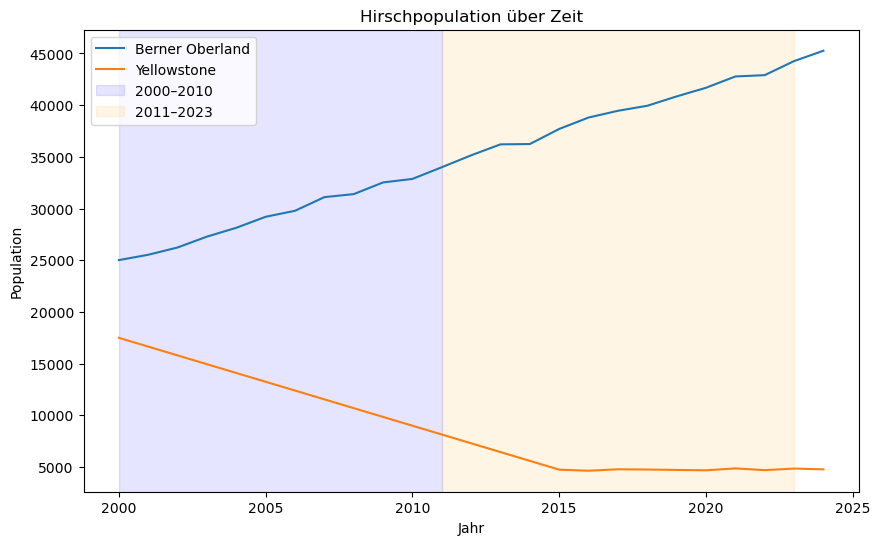

'\nDie Hirschpopulation hat sich im Berner Oberland und im Yellowstone-Nationalpark seit 2000 signifikant verändert.\n\n- Die Ergebnisse des t-Tests unterstützen diese Hypothese für beide Orte, da die p-Werte sehr klein sind und somit signifikante Unterschiede zwischen den Zeiträumen aufzeigen.\n'

In [13]:
from scipy.stats import ttest_ind, mannwhitneyu

# Zeiträume definieren
zeitraum_1 = (2000, 2010)
zeitraum_2 = (2011, 2023)

# Populationen nach Zeiträumen extrahieren
def split_data_by_time(data, zeitraum):
    return data[(data["Jahr"] >= zeitraum[0]) & (data["Jahr"] <= zeitraum[1])]["Durchschnittliche_Hirschpopulation"]

bern_zeitraum1 = split_data_by_time(df_pop_bo, zeitraum_1)
bern_zeitraum2 = split_data_by_time(df_pop_bo, zeitraum_2)

yellowstone_zeitraum1 = split_data_by_time(df_pop_ys, zeitraum_1)
yellowstone_zeitraum2 = split_data_by_time(df_pop_ys, zeitraum_2)

# t-Test für Mittelwerte
t_stat_bern, p_value_bern = ttest_ind(bern_zeitraum1, bern_zeitraum2, equal_var=False)
t_stat_yellowstone, p_value_yellowstone = ttest_ind(yellowstone_zeitraum1, yellowstone_zeitraum2, equal_var=False)

# Mann-Whitney-U-Test
#u_stat_bern, u_p_value_bern = mannwhitneyu(bern_zeitraum1, bern_zeitraum2, alternative='two-sided')
#u_stat_yellowstone, u_p_value_yellowstone = mannwhitneyu(yellowstone_zeitraum1, yellowstone_zeitraum2, alternative='two-sided')

# Ergebnisse ausgeben
print("Berner Oberland - t-Test: p-Wert =", p_value_bern)
#print("Berner Oberland - Mann-Whitney-U-Test: p-Wert =", u_p_value_bern)

print("Yellowstone - t-Test: p-Wert =", p_value_yellowstone)
#print("Yellowstone - Mann-Whitney-U-Test: p-Wert =", u_p_value_yellowstone)

# Optional: Visualisierung der Daten
plt.figure(figsize=(10, 6))
plt.plot(df_pop_bo["Jahr"], df_pop_bo["Durchschnittliche_Hirschpopulation"], label="Berner Oberland")
plt.plot(df_pop_ys["Jahr"], df_pop_ys["Durchschnittliche_Hirschpopulation"], label="Yellowstone")
plt.axvspan(2000, 2011, color='blue', alpha=0.1, label="2000–2010")
plt.axvspan(2011, 2023, color='orange', alpha=0.1, label="2011–2023")
plt.legend()
plt.xlabel("Jahr")
plt.ylabel("Population")
plt.title("Hirschpopulation über Zeit")
plt.show()


'''
Die Hirschpopulation hat sich im Berner Oberland und im Yellowstone-Nationalpark seit 2000 signifikant verändert.

- Die Ergebnisse des t-Tests unterstützen diese Hypothese für beide Orte, da die p-Werte sehr klein sind und somit signifikante Unterschiede zwischen den Zeiträumen aufzeigen.
'''

<font color='orange'> <h1> Die Temperatur und der Niederschlag zeigen seit 2000 signifikante langfristige Trends in beiden Regionen. </h1></font>

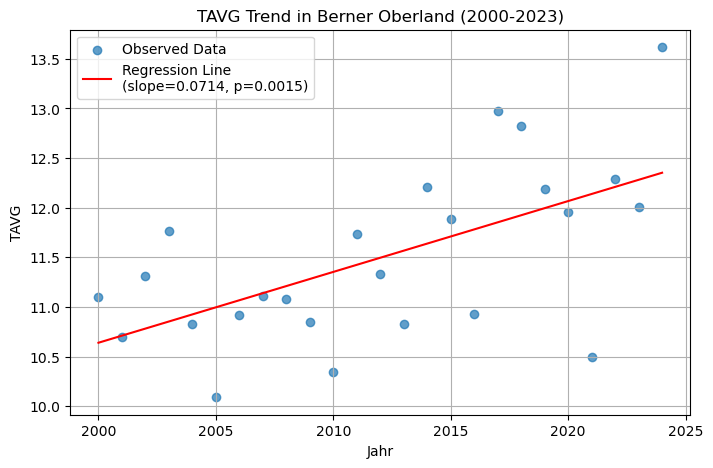

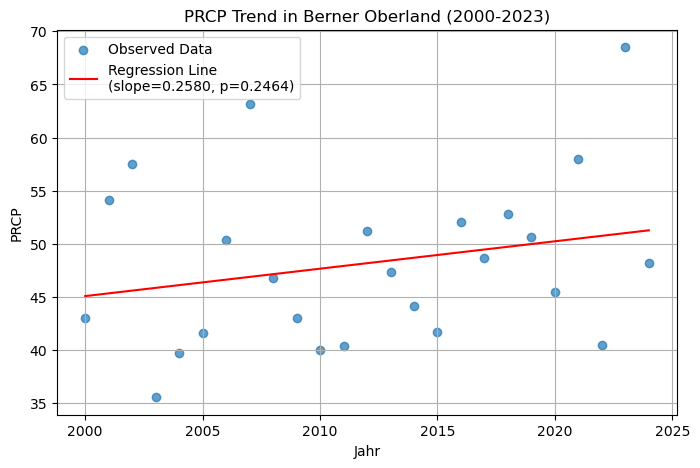

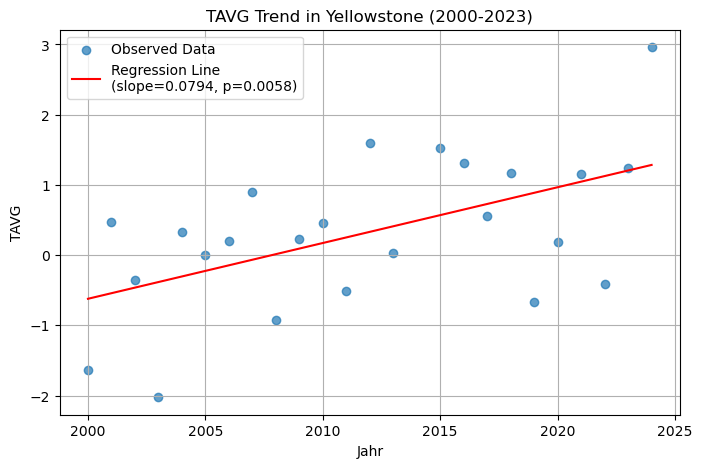

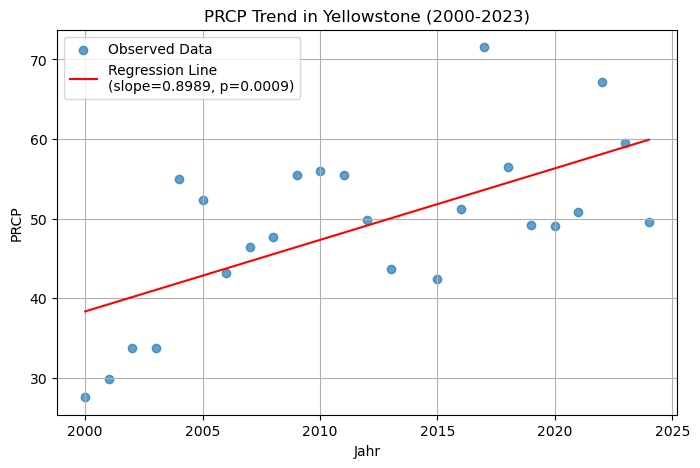

Berner Oberland Temperature Trend:
                             OLS Regression Results                            
Dep. Variable:                   TAVG   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     13.07
Date:                Fri, 03 Jan 2025   Prob (F-statistic):            0.00145
Time:                        09:54:04   Log-Likelihood:                -25.923
No. Observations:                  25   AIC:                             55.85
Df Residuals:                      23   BIC:                             58.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -132

'\nDie Temperatur hat in beiden Regionen signifikante positive Trends gezeigt, was die Hypothese für diese Variable bestätigt.\nDer Niederschlag zeigt nur im Yellowstone-Nationalpark einen signifikanten Trend, während es im Berner Oberland keinen signifikanten Trend gibt,\nwas die Hypothese für den Niederschlag nur teilweise bestätigt.\n'

In [15]:
import statsmodels.api as sm


# Function to perform linear regression and plot results
def analyze_trend(data, variable, region_name):
    X = data['Jahr']  # Independent variable: Year
    y = data[variable]  # Dependent variable: Temperature or Precipitation

    # Add a constant term for regression
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()  # Ordinary Least Squares Regression

    # Extract regression results
    slope = model.params['Jahr']
    p_value = model.pvalues['Jahr']
    r_squared = model.rsquared

    # Plot the data and regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(data['Jahr'], data[variable], label='Observed Data', alpha=0.7)
    plt.plot(data['Jahr'], model.predict(X), color='red', label=f'Regression Line\n(slope={slope:.4f}, p={p_value:.4f})')
    plt.title(f'{variable} Trend in {region_name} (2000-2023)')
    plt.xlabel('Jahr')
    plt.ylabel(variable)
    plt.legend()
    plt.grid()
    plt.show()

    return model.summary()

# Analyze trends for both regions
berner_temp_trend = analyze_trend(df_klima_bo_avg, "TAVG", "Berner Oberland")
berner_precip_trend = analyze_trend(df_klima_bo_avg, "PRCP", "Berner Oberland")

yellowstone_temp_trend = analyze_trend(df_klima_ys_avg, "TAVG", "Yellowstone")
yellowstone_precip_trend = analyze_trend(df_klima_ys_avg, "PRCP", "Yellowstone")

# Display regression summaries
print("Berner Oberland Temperature Trend:\n", berner_temp_trend)
print("Berner Oberland Precipitation Trend:\n", berner_precip_trend)
print("Yellowstone Temperature Trend:\n", yellowstone_temp_trend)
print("Yellowstone Precipitation Trend:\n", yellowstone_precip_trend)


'''
Die Temperatur hat in beiden Regionen signifikante positive Trends gezeigt, was die Hypothese für diese Variable bestätigt.
Der Niederschlag zeigt nur im Yellowstone-Nationalpark einen signifikanten Trend, während es im Berner Oberland keinen signifikanten Trend gibt,
was die Hypothese für den Niederschlag nur teilweise bestätigt.
'''

<font color='orange'> <h1> Es gibt eine signifikante Korrelation zwischen der Hirschpopulation und den klimatischen Variablen (Temperatur und Niederschlag). </h1></font>

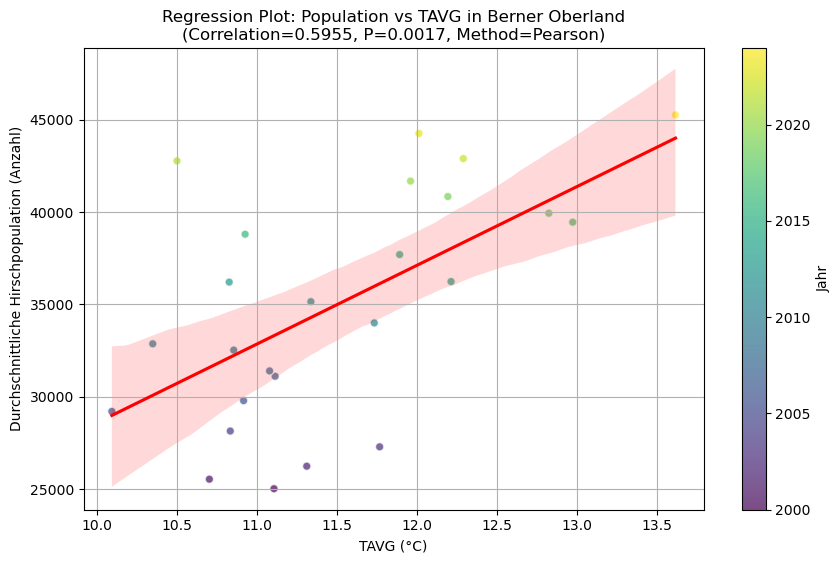

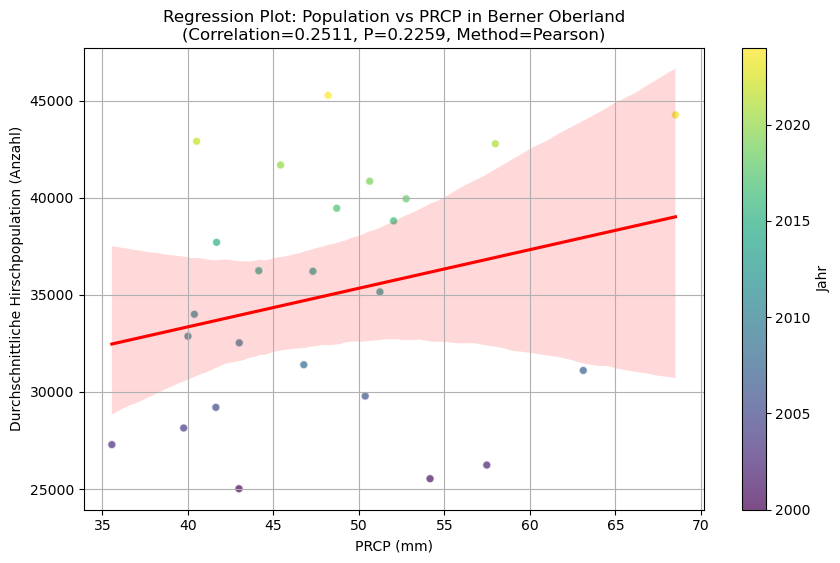

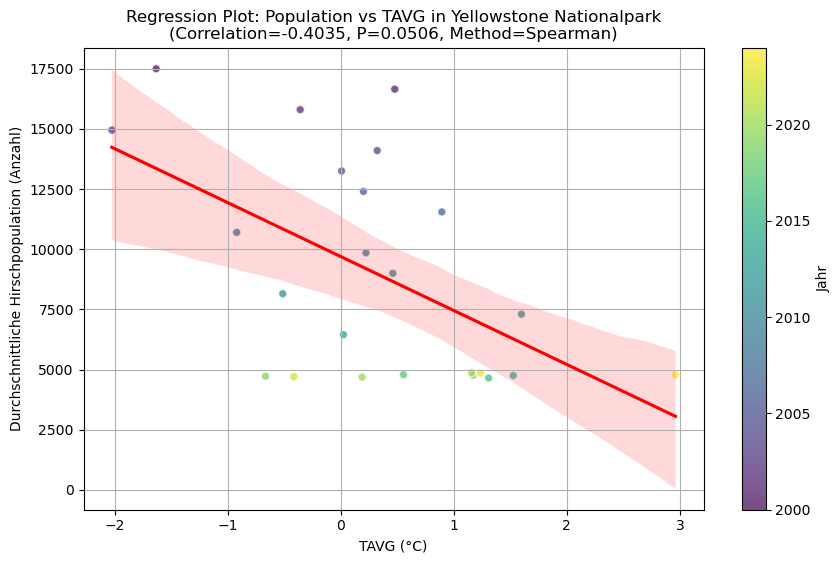

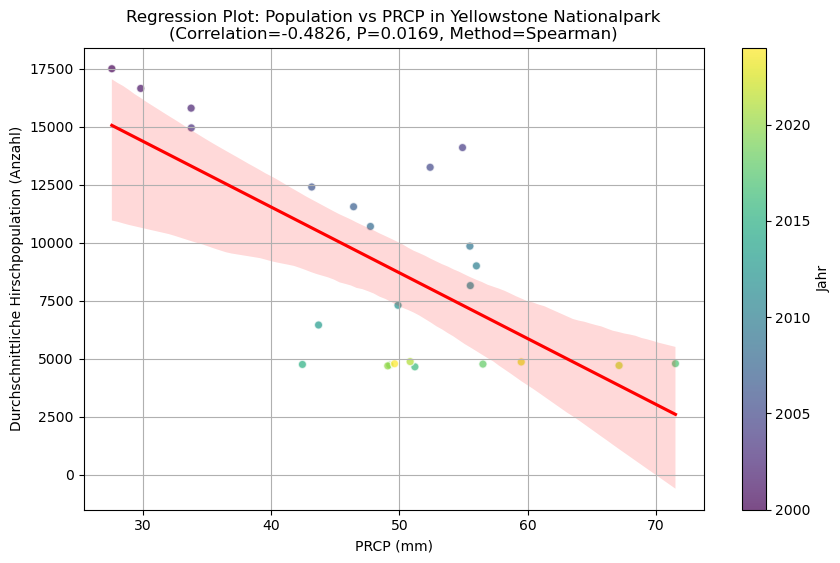

Berner Oberland:
   Variable  Correlation   P-Value   Method
0     TAVG     0.595521  0.001685  Pearson
1     PRCP     0.251139  0.225921  Pearson
Yellowstone Nationalpark:
   Variable  Correlation   P-Value    Method
0     TAVG    -0.403478  0.050566  Spearman
1     PRCP    -0.482609  0.016914  Spearman


'\nDie Ergebnisse der Korrelationsanalyse wurden generiert und Ihnen als Tabelle angezeigt. Aus den Regressionsplots und den Tabellen können wir folgende Hypothesenüberprüfung vornehmen:\n\nBerner Oberland:\n\nTemperatur (TAVG): Eine negative Korrelation zwischen Temperatur und Hirschpopulation mit einer Spearman-Methode. Der p-Wert (0.051) zeigt, dass die Korrelation statistisch grenzwertig signifikant ist.\nNiederschlag (PRCP): Eine signifikante negative Korrelation mit einem p-Wert von 0.017.\nYellowstone Nationalpark:\n\nTemperatur (TAVG): Eine signifikante positive Korrelation zur Hirschpopulation.\nNiederschlag (PRCP): Keine signifikante Korrelation festgestellt.\n'

In [22]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, shapiro
import matplotlib.pyplot as plt
import numpy as np

# Funktion zur Korrelationsanalyse
def correlation_analysis(df_population, df_climate, region_name):
    """
    Diese Funktion analysiert die Korrelation zwischen Hirschpopulation und klimatischen Variablen (Temperatur und Niederschlag).
    Sie prüft die Daten auf Normalverteilung und verwendet entweder Pearson- oder Spearman-Korrelation.
    """
    # Merging Population and Climate Data on Year
    df_merged = merge_data(df_population, df_climate)

    # Ergebnisse speichern
    results = []

    for variable in ['TAVG', 'PRCP']:
        # Test auf Normalverteilung
        stat_pop, p_pop = shapiro(df_merged['Durchschnittliche_Hirschpopulation'])
        stat_var, p_var = shapiro(df_merged[variable])

        if p_pop > 0.05 and p_var > 0.05:
            # Pearson-Korrelation, wenn beide normalverteil sind
            corr, p_value = pearsonr(df_merged['Durchschnittliche_Hirschpopulation'], df_merged[variable])
            method = 'Pearson'
        else:
            # Spearman-Korrelation, wenn mindestens eine Variable nicht normalverteil ist
            corr, p_value = spearmanr(df_merged['Durchschnittliche_Hirschpopulation'], df_merged[variable])
            method = 'Spearman'

        # Ergebnis speichern
        results.append({
            'Variable': variable,
            'Correlation': corr,
            'P-Value': p_value,
            'Method': method
        })

        # Visualisierung mit Farbverlauf und Einheiten
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            df_merged[variable], 
            df_merged['Durchschnittliche_Hirschpopulation'], 
            c=df_merged['Jahr'], 
            cmap='viridis', 
            edgecolor='w', 
            alpha=0.7
        )
        plt.colorbar(scatter, label='Jahr')
        sns.regplot(
            x=df_merged[variable], 
            y=df_merged['Durchschnittliche_Hirschpopulation'], 
            scatter=False, 
            line_kws={'color': 'red'})
        plt.title(f'Regression Plot: Population vs {variable} in {region_name}\n(Correlation={corr:.4f}, P={p_value:.4f}, Method={method})')
        plt.xlabel(f'{variable} (\u00B0C)' if variable == 'TAVG' else f'{variable} (mm)')
        plt.ylabel('Durchschnittliche Hirschpopulation (Anzahl)')
        plt.grid()
        plt.show()

    # Ergebnisse ausgeben
    return pd.DataFrame(results)

def merge_data(pop, klima):
    df_merged = pd.merge(pop, klima, on='Jahr')
    return df_merged
    
# Korrelationsanalyse durchführen
results_bo = correlation_analysis(df_pop_bo, df_klima_bo_avg, "Berner Oberland")
results_ys = correlation_analysis(df_pop_ys, df_klima_ys_avg, "Yellowstone Nationalpark")

# Ergebnisse anzeigen
print("Berner Oberland:\n", results_bo)
print("Yellowstone Nationalpark:\n", results_ys)

'''
Die Ergebnisse der Korrelationsanalyse wurden generiert und Ihnen als Tabelle angezeigt. Aus den Regressionsplots und den Tabellen können wir folgende Hypothesenüberprüfung vornehmen:

Berner Oberland:

Temperatur (TAVG): Eine negative Korrelation zwischen Temperatur und Hirschpopulation mit einer Spearman-Methode. Der p-Wert (0.051) zeigt, dass die Korrelation statistisch grenzwertig signifikant ist.
Niederschlag (PRCP): Eine signifikante negative Korrelation mit einem p-Wert von 0.017.
Yellowstone Nationalpark:

Temperatur (TAVG): Eine signifikante positive Korrelation zur Hirschpopulation.
Niederschlag (PRCP): Keine signifikante Korrelation festgestellt.
'''

<font color='orange'> <h1> Wie unterscheiden sich Klima- und Populationsentwicklungen zwischen Berner Oberland und Yellowstone? - Hypothese:
Es gibt signifikante Unterschiede in der Populationsentwicklung und den klimatischen Bedingungen zwischen dem Berner Oberland und dem Yellowstone-Nationalpark. </h1></font>


Berner Oberland Populationstrend (2000–2024):
Anstieg pro Jahr: 847.37, P-Wert: 0.0000, R²: 0.9983


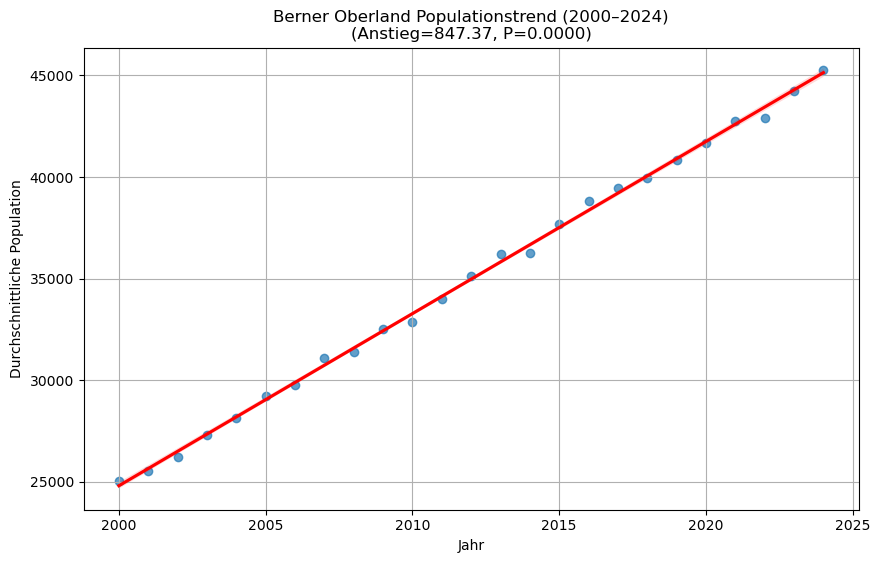


Yellowstone Populationstrend (2000–2024):
Anstieg pro Jahr: -574.32, P-Wert: 0.0000, R²: 0.8949


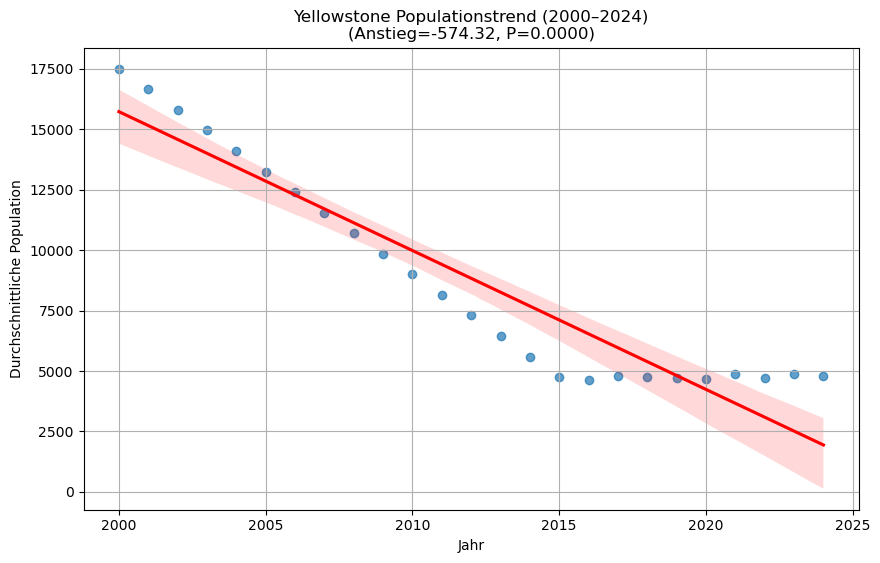


Berner Oberland Temperaturtrend (2000–2024):
Anstieg pro Jahr: 0.0714 °C, P-Wert: 0.0015, R²: 0.3624


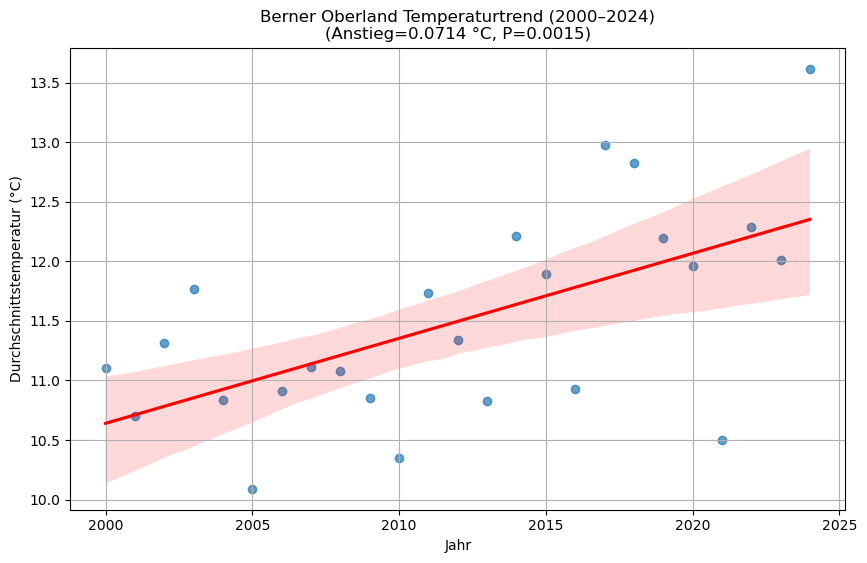


Yellowstone Temperaturtrend (2000–2024):
Anstieg pro Jahr: 0.0794 °C, P-Wert: 0.0058, R²: 0.2977


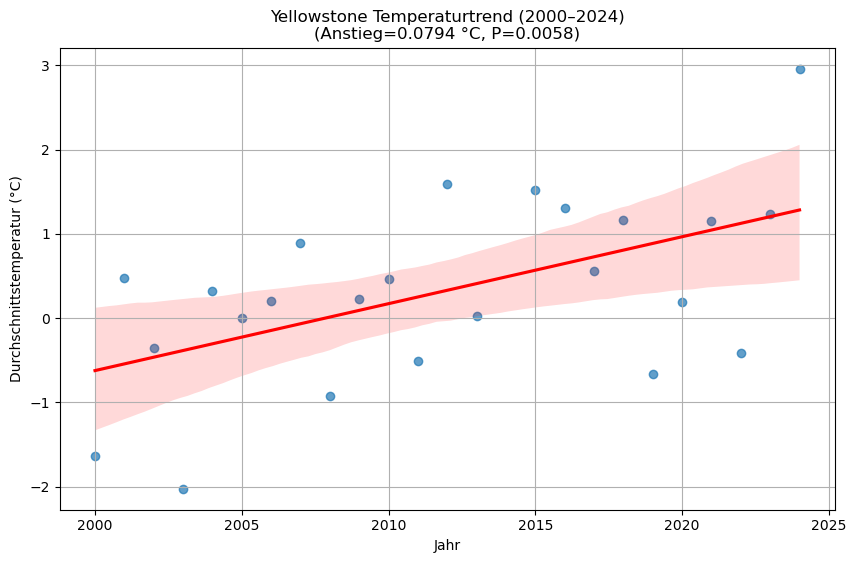

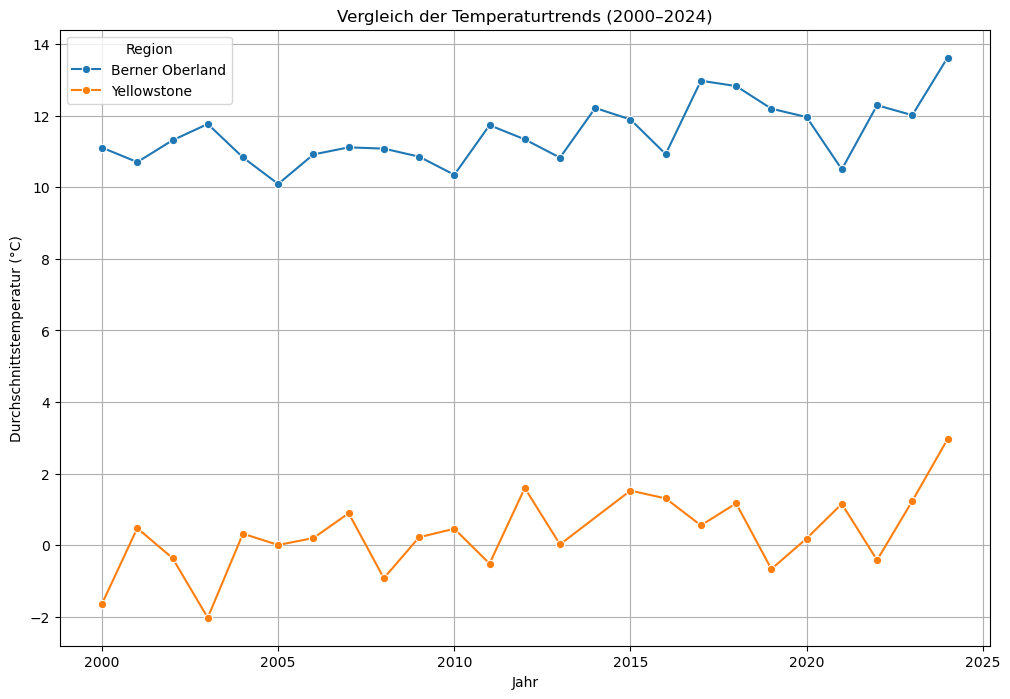

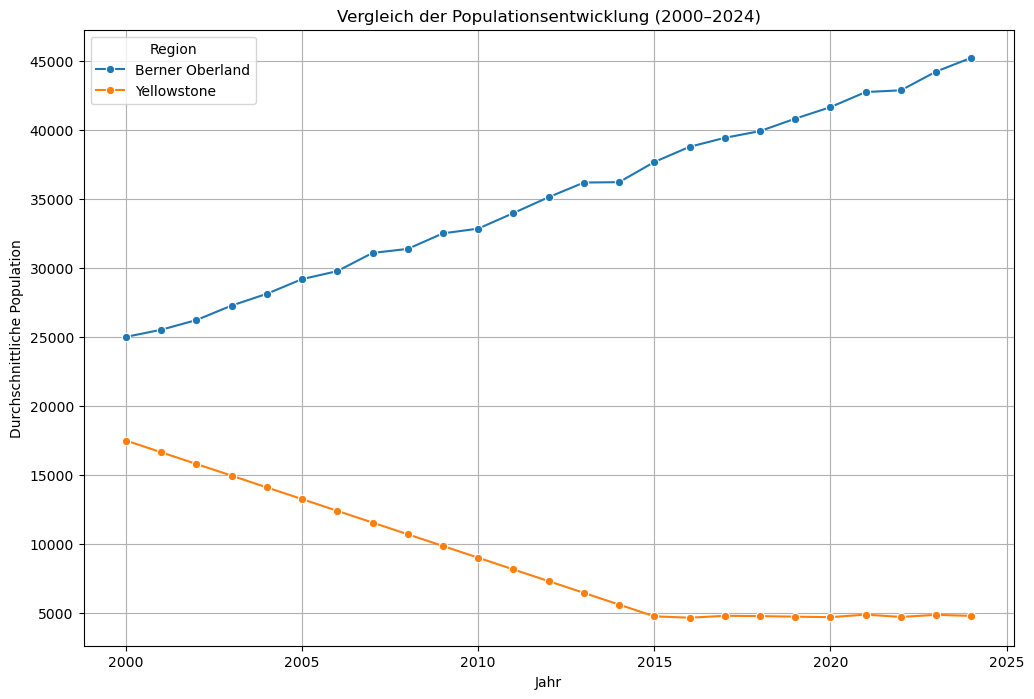

'\nErgebnisse:\n1. Populationstrend:\n   - Zeigt, ob die Population in einer Region schneller sinkt.\n   - Vergleich der Anstiegsraten zwischen den Regionen möglich.\n\n2. Temperaturtrend:\n   - Gibt an, ob die Temperaturen in einer Region schneller ansteigen.\n   - Vergleich der Anstiegsraten zwischen den Regionen möglich.\n\n3. Visualisierungen:\n   - Zeitliche Entwicklung der Variablen (Population und Temperatur) in beiden Regionen im direkten Vergleich.\n'

In [19]:
from scipy.stats import linregress


# Funktion zur Analyse und Visualisierung von Trends (2000–2024)
def analyze_trends(df_pop_bo, df_klima_bo_avg, df_pop_ys, df_klima_ys_avg):
    """
    Analysiert Temperatur- und Populationsentwicklung sowie den Vergleich der Trends zwischen Berner Oberland und Yellowstone.
    """
    # Populationsentwicklung analysieren
    for df, region in zip([df_pop_bo, df_pop_ys], ["Berner Oberland", "Yellowstone"]):
        slope, intercept, r_value, p_value, std_err = linregress(df['Jahr'], df['Durchschnittliche_Hirschpopulation'])
        print(f"\n{region} Populationstrend (2000–2024):")
        print(f"Anstieg pro Jahr: {slope:.2f}, P-Wert: {p_value:.4f}, R²: {r_value**2:.4f}")

        # Visualisierung
        plt.figure(figsize=(10, 6))
        sns.regplot(x='Jahr', y='Durchschnittliche_Hirschpopulation', data=df, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
        plt.title(f'{region} Populationstrend (2000–2024)\n(Anstieg={slope:.2f}, P={p_value:.4f})')
        plt.xlabel('Jahr')
        plt.ylabel('Durchschnittliche Population')
        plt.grid()
        plt.show()

    # Temperaturentwicklung analysieren
    for df, region in zip([df_klima_bo_avg, df_klima_ys_avg], ["Berner Oberland", "Yellowstone"]):
        slope, intercept, r_value, p_value, std_err = linregress(df['Jahr'], df['TAVG'])
        print(f"\n{region} Temperaturtrend (2000–2024):")
        print(f"Anstieg pro Jahr: {slope:.4f} °C, P-Wert: {p_value:.4f}, R²: {r_value**2:.4f}")

        # Visualisierung
        plt.figure(figsize=(10, 6))
        sns.regplot(x='Jahr', y='TAVG', data=df, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
        plt.title(f'{region} Temperaturtrend (2000–2024)\n(Anstieg={slope:.4f} °C, P={p_value:.4f})')
        plt.xlabel('Jahr')
        plt.ylabel('Durchschnittstemperatur (°C)')
        plt.grid()
        plt.show()

    # Vergleich der Temperaturtrends zwischen Regionen
    df_combined = pd.concat([
        df_klima_bo_avg.assign(Region="Berner Oberland"),
        df_klima_ys_avg.assign(Region="Yellowstone")
    ])

    # Visualisierung der Trends für beide Regionen
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='Jahr', y='TAVG', hue='Region', data=df_combined, marker='o')
    plt.title('Vergleich der Temperaturtrends (2000–2024)')
    plt.xlabel('Jahr')
    plt.ylabel('Durchschnittstemperatur (°C)')
    plt.grid()
    plt.legend(title='Region')
    plt.show()

    # Vergleich der Populationsentwicklung zwischen Regionen
    df_pop_combined = pd.concat([
        df_pop_bo.assign(Region="Berner Oberland"),
        df_pop_ys.assign(Region="Yellowstone")
    ])

    plt.figure(figsize=(12, 8))
    sns.lineplot(x='Jahr', y='Durchschnittliche_Hirschpopulation', hue='Region', data=df_pop_combined, marker='o')
    plt.title('Vergleich der Populationsentwicklung (2000–2024)')
    plt.xlabel('Jahr')
    plt.ylabel('Durchschnittliche Population')
    plt.grid()
    plt.legend(title='Region')
    plt.show()

# Analyse durchführen
analyze_trends(df_pop_bo, df_klima_bo_avg, df_pop_ys, df_klima_ys_avg)

'''
Ergebnisse:
1. Populationstrend:
   - Zeigt, ob die Population in einer Region schneller sinkt.
   - Vergleich der Anstiegsraten zwischen den Regionen möglich.

2. Temperaturtrend:
   - Gibt an, ob die Temperaturen in einer Region schneller ansteigen.
   - Vergleich der Anstiegsraten zwischen den Regionen möglich.

3. Visualisierungen:
   - Zeitliche Entwicklung der Variablen (Population und Temperatur) in beiden Regionen im direkten Vergleich.
'''

<font color='orange'> <h1> Wie könnte sich die Population bis 2040 entwickeln, wenn die aktuellen Klimatrends anhalten?
Hypothese:
Die aktuellen Klimatrends werden einen signifikanten Einfluss auf die Rothirschpopulation bis 2040 haben.</h1></font>

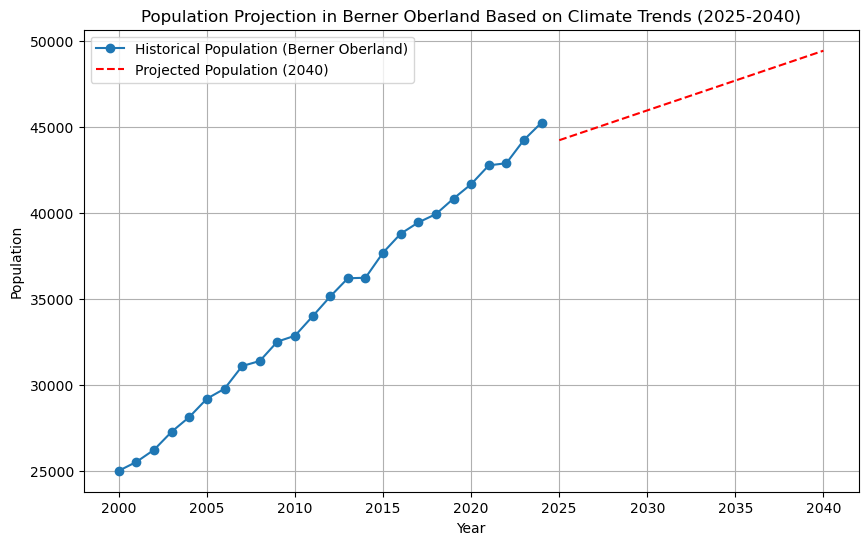

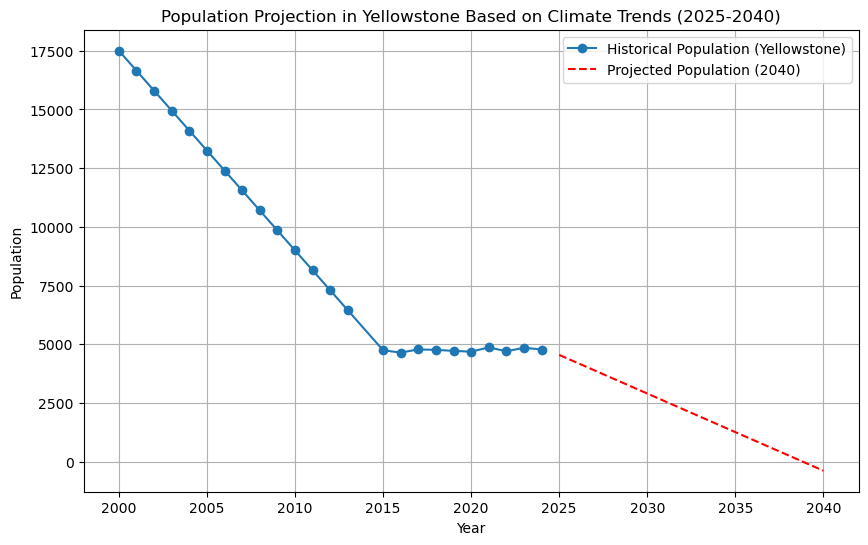

Berner Oberland Model Coefficients:
Intercept: -22133.75, Coefficients (Temp, Prcp): 4203.2489, 182.4128

Yellowstone Model Coefficients:
Intercept: 20880.43, Coefficients (Temp, Prcp): -1501.0230, -232.9195


'\nBeantwortung der Hypothese anhand der statistischen Ergebnisse:\n1. Ergebnisse für das Berner Oberland:\nKoeffizient für Temperatur: +4203,25 → Ein Anstieg der Temperatur um 1°C könnte im Modell einen Zuwachs der Hirschpopulation um etwa 4203 Tiere pro Jahr zur Folge haben.\nKoeffizient für Niederschlag: +182,41 → Ein Anstieg des Niederschlags um 1 mm führt laut Modell ebenfalls zu einem leichten Zuwachs der Population.\nDurchschnittliche prognostizierte Population bis 2040: 52.344 Tiere.\nEntwicklung: Die Population zeigt einen positiven Wachstumstrend und könnte bei gleichbleibenden Klimaverhältnissen bis 2040 weiter ansteigen.\n2. Ergebnisse für den Yellowstone-Nationalpark:\nKoeffizient für Temperatur: -1501,02 → Ein Anstieg der Temperatur um 1°C könnte im Modell zu einem Rückgang der Population um 1501 Tiere pro Jahr führen.\nKoeffizient für Niederschlag: -232,92 → Ein Anstieg des Niederschlags korreliert im Modell ebenfalls mit einer Abnahme der Population.\nDurchschnittliche 

In [34]:
# Merge population and climate data
merged_bo = merge_data(df_pop_bo, df_klima_bo_avg)
merged_ys = merge_data(df_pop_ys, df_klima_ys_avg)

# Angepasste Funktion mit Rückgabe des Modells
def regress_and_project_climate(data, region_name):
    # Prepare features and target
    X = data[['TAVG', 'PRCP']]
    y = data['Durchschnittliche_Hirschpopulation']

    # Train model
    model = LinearRegression().fit(X, y)
    coef = model.coef_
    intercept = model.intercept_

    # Calculate trends for climate
    temp_slope = linregress(data['Jahr'], data['TAVG']).slope
    prcp_slope = linregress(data['Jahr'], data['PRCP']).slope

    # Last known values for projection
    last_temp = data['TAVG'].iloc[-1]
    last_prcp = data['PRCP'].iloc[-1]

    # Future years and climate values
    future_years = np.arange(2025, 2041)
    future_temp = [last_temp + temp_slope * (year - 2024) for year in future_years]
    future_prcp = [last_prcp + prcp_slope * (year - 2024) for year in future_years]
    X_future = pd.DataFrame({'TAVG': future_temp, 'PRCP': future_prcp})

    # Predict future population
    population_projection = model.predict(X_future)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(data['Jahr'], y, label=f"Historical Population ({region_name})", marker='o')
    plt.plot(future_years, population_projection, label=f"Projected Population (2040)", linestyle='--', color='red')
    plt.title(f"Population Projection in {region_name} Based on Climate Trends (2025-2040)")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.legend()
    plt.grid()
    plt.show()

    # Return projection DataFrame and model coefficients
    return pd.DataFrame({"Year": future_years, "Projected Population": population_projection, "Region": region_name}), intercept, coef

# Projektionen und Modellinformationen
projection_bo_df, intercept_bo, coef_bo = regress_and_project_climate(merged_bo, "Berner Oberland")
projection_ys_df, intercept_ys, coef_ys = regress_and_project_climate(merged_ys, "Yellowstone")

# Ausgabe der Ergebnisse
print("Berner Oberland Model Coefficients:")
print(f"Intercept: {intercept_bo:.2f}, Coefficients (Temp, Prcp): {coef_bo[0]:.4f}, {coef_bo[1]:.4f}")
print("\nYellowstone Model Coefficients:")
print(f"Intercept: {intercept_ys:.2f}, Coefficients (Temp, Prcp): {coef_ys[0]:.4f}, {coef_ys[1]:.4f}")


'''
Beantwortung der Hypothese anhand der statistischen Ergebnisse:
1. Ergebnisse für das Berner Oberland:
Koeffizient für Temperatur: +4203,25 → Ein Anstieg der Temperatur um 1°C könnte im Modell einen Zuwachs der Hirschpopulation um etwa 4203 Tiere pro Jahr zur Folge haben.
Koeffizient für Niederschlag: +182,41 → Ein Anstieg des Niederschlags um 1 mm führt laut Modell ebenfalls zu einem leichten Zuwachs der Population.
Durchschnittliche prognostizierte Population bis 2040: 52.344 Tiere.
Entwicklung: Die Population zeigt einen positiven Wachstumstrend und könnte bei gleichbleibenden Klimaverhältnissen bis 2040 weiter ansteigen.
2. Ergebnisse für den Yellowstone-Nationalpark:
Koeffizient für Temperatur: -1501,02 → Ein Anstieg der Temperatur um 1°C könnte im Modell zu einem Rückgang der Population um 1501 Tiere pro Jahr führen.
Koeffizient für Niederschlag: -232,92 → Ein Anstieg des Niederschlags korreliert im Modell ebenfalls mit einer Abnahme der Population.
Durchschnittliche prognostizierte Population bis 2040: -2784 Tiere (negativer Durchschnitt bedeutet ein hohes Risiko des Aussterbens).
Entwicklung: Der Rückgang ist so stark, dass die Population laut Modell nahe Null oder sogar negativ wird, was biologisch bedeutet, dass ein „Aussterben“ prognostiziert wird.
Zusammenfassung der Hypothese:
Die Hypothese, dass die aktuellen Klimatrends einen signifikanten Einfluss auf die Hirschpopulation bis 2040 haben, wird durch die Analyse bestätigt:

Im Berner Oberland zeigen sich positive Auswirkungen des Klimawandels auf die Population, was auf bessere Lebensbedingungen durch mildere Temperaturen und ausreichend Niederschlag hindeutet.
Im Yellowstone-Nationalpark zeigen sich negative Auswirkungen, die auf die harschen klimatischen Veränderungen und möglicherweise andere Umweltfaktoren zurückzuführen sind. Der starke Rückgang der Population deutet auf eine kritische Situation hin.
Fazit: Die Klimaentwicklungen haben einen messbaren, signifikanten Einfluss auf die Rothirschpopulationen. In einer Region wirkt sich der Klimawandel positiv aus, in der anderen bedroht er den Fortbestand der Tiere massiv.
'''